# Figure6 Peaks number, average length and signal to noise ratio

Peak calling tuning improvement from defaults to tuned SPAN.

In [48]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from IPython.display import display
import pandas as pd

import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from collections import OrderedDict, Counter

AGE_PALETTE = {'Old': '#E41A1C', 'Young': '#377EB8'}

TOOLS_PALETTE = {'macs_broad': "#EDEDED", 'sicer': "#EDEDED", 'span': '#FBE5D6'}


df = pd.read_csv('/mnt/stripe/bio/experiments/configs/Y20O20/benchmark/Y20O20_peaks_summary_uli.tsv', 
                 sep='\t', comment='#')
df = df.loc[df['status'] != 'failed']
df['avg_length'] = df['length'] / df['peaks']
df.loc[~np.isfinite(df["avg_length"]), "avg_length"] = 0.0
print(set(df['tool']))
display(df.head(1))

{'span', 'macs_broad', 'sicer'}


,donor,modification,tool,peaks,length,frip,procedure,params,file,status,avg_length
0,OD1,H3K27ac,sicer,32168,53901232,0.156373,tuned,W200-G0-FDR1.0E-8,/mnt/stripe/bio/experiments/configs/Y20O20/ben...,ok,1675.616513


# Graphics of peaks number across different marks and tools

In [49]:
def plot_data(df, toshow, value, description):
    # Filter out dataframe to given combination of target, tool and procedure.
    dfs = []
    for m, tps in toshow.items():
        for (tool, procedure) in tps:
            dfmtp = df.loc[np.logical_and(df['tool'].str.lower() == tool.lower(), 
                              np.logical_and(df['modification'] == m, 
                                             df['procedure'] == procedure))]
            dfs.append(dfmtp)
    dft = pd.concat(dfs, axis=0)
    dft['mp'] = dft['modification'] + " " + dft['tool'] + " " + dft['procedure']
    dft["age"] = "Young"
    dft.loc[dft.donor.str.startswith("OD"), "age"] = "Old"

    
    ms = ['H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3']
    axs = {}
    mpl = len(set(dft['mp']))
    fig = plt.figure(figsize=(int(len(set(dft['mp'])) * .75), 4))
    offset = 0
    for m in ms:
        data = dft.loc[dft['modification'] == m]
        xlabels = []
        for t in data['tool']:
            if t not in xlabels:
                xlabels.append(t)
        w = len(set(data['mp']))
        ax = plt.subplot2grid((1, mpl), (0, offset), colspan=w)

        sns.barplot(data=data, 
                 x="tool", y=value,
                 ci="sd", capsize=.2, errwidth=2,
                 palette=TOOLS_PALETTE, 
                 edgecolor="black",
                 ax = ax)

        sns.swarmplot(data=data,
              x="tool", y=value,
              size=3, #5
              hue = "age",
              palette=AGE_PALETTE,
              ax = ax)
        ax.legend().set_visible(False)
        axs[ax] = plt.ylim()
        if offset > 0:
            ax.get_yaxis().set_ticklabels([])
            ax.set_ylabel('')
        else:
            ax.set_ylabel(description)
        
        offset += w
        ax.set_xlabel('')
        ax.set_title(m)
        plt.xticks(range(0, len(xlabels)), xlabels, rotation=90)
            
    ymin = np.min([v[0] for v in axs.values()])
    ymax = np.max([v[1] for v in axs.values()])
 
    for ax in axs.keys():
        ax.set_ylim(bottom = ymin, top = ymax)
    plt.tight_layout()

# Default

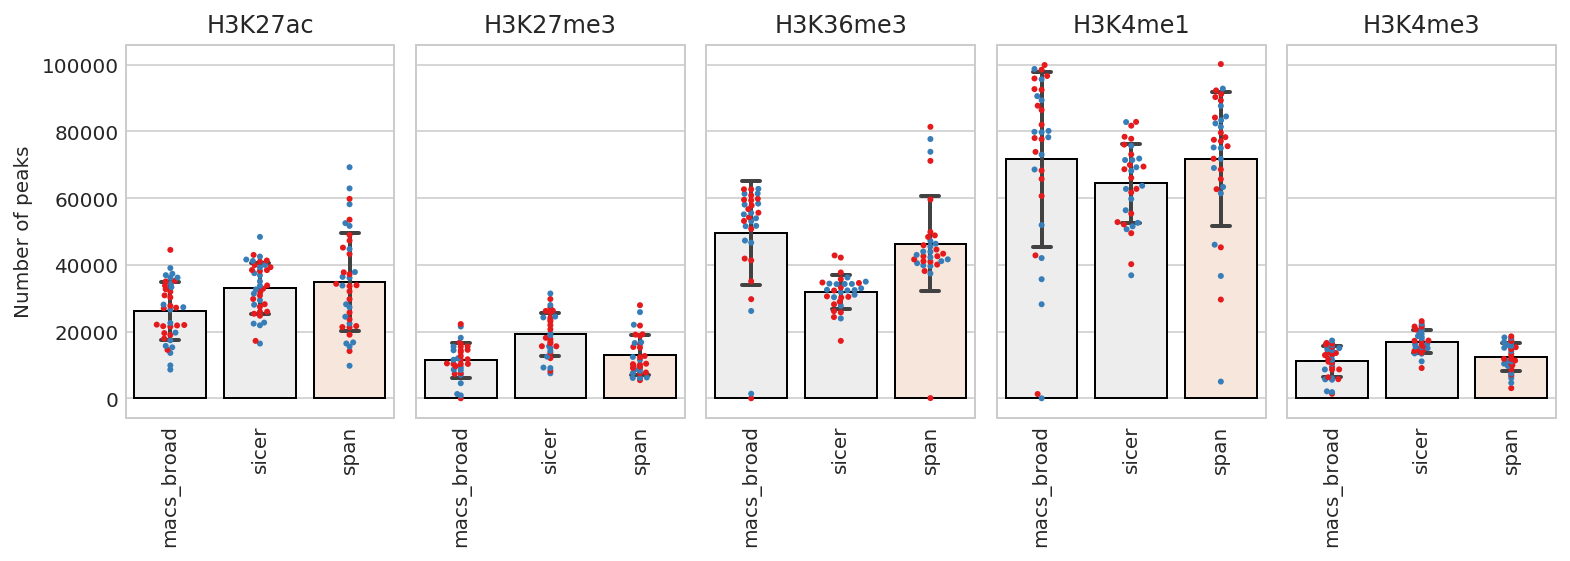

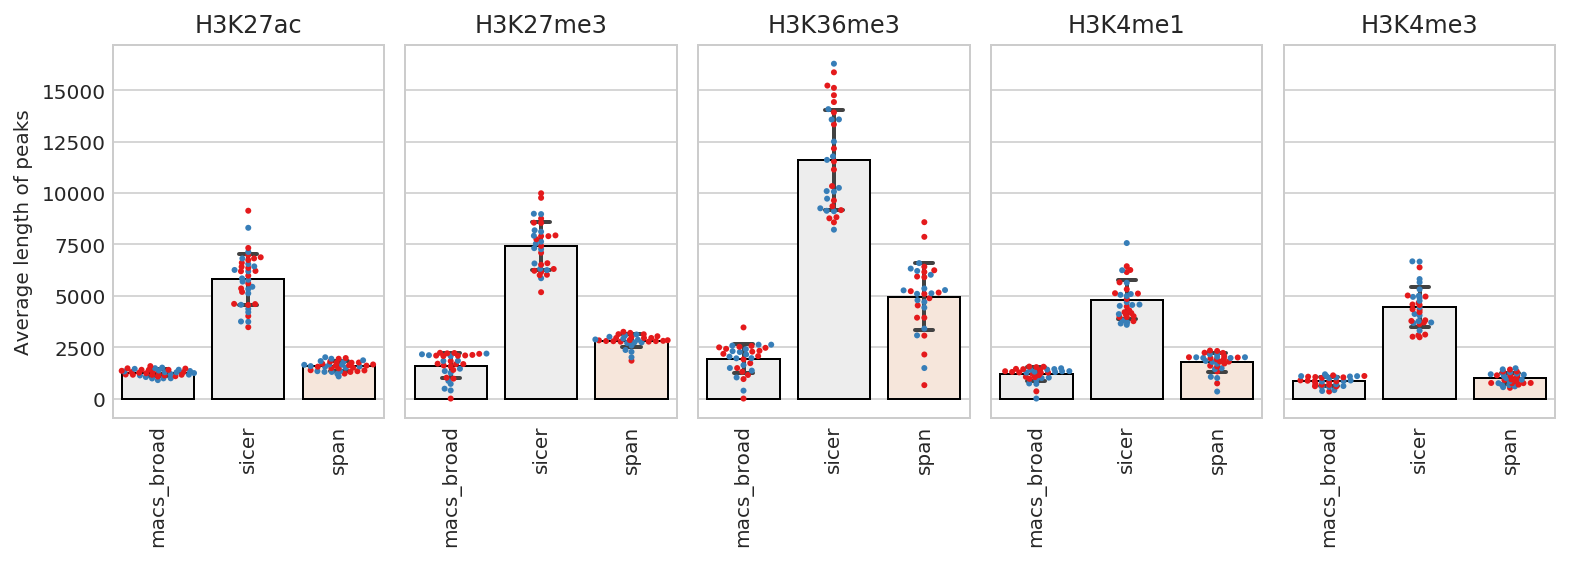

In [50]:
toshow = OrderedDict([
    ("H3K27ac", [("MACS_BROAD", "default"), ("SICER", "default"), ("SPAN", "default")]),
    ("H3K27me3", [("MACS_BROAD", "default"), ("SICER", "default"), ("SPAN", "default")]),
    ("H3K36me3", [("MACS_BROAD", "default"), ("SICER", "default"), ("SPAN", "default")]),
    ("H3K4me1", [("MACS_BROAD", "default"), ("SICER", "default"), ("SPAN", "default")]),
    ("H3K4me3", [("MACS_BROAD", "default"), ("SICER", "default"), ("SPAN", "default")])
])

# Plot peaks number
with PdfPages('/mnt/stripe/figures/peaks_number_default.pdf') as pdf:
    plot_data(df, toshow, 'peaks', 'Number of peaks')
    pdf.savefig()

# Plot peaks length
with PdfPages('/mnt/stripe/figures/peaks_length_default.pdf') as pdf:
    plot_data(df, toshow, 'avg_length', 'Average length of peaks')
    pdf.savefig()    

# Tuned

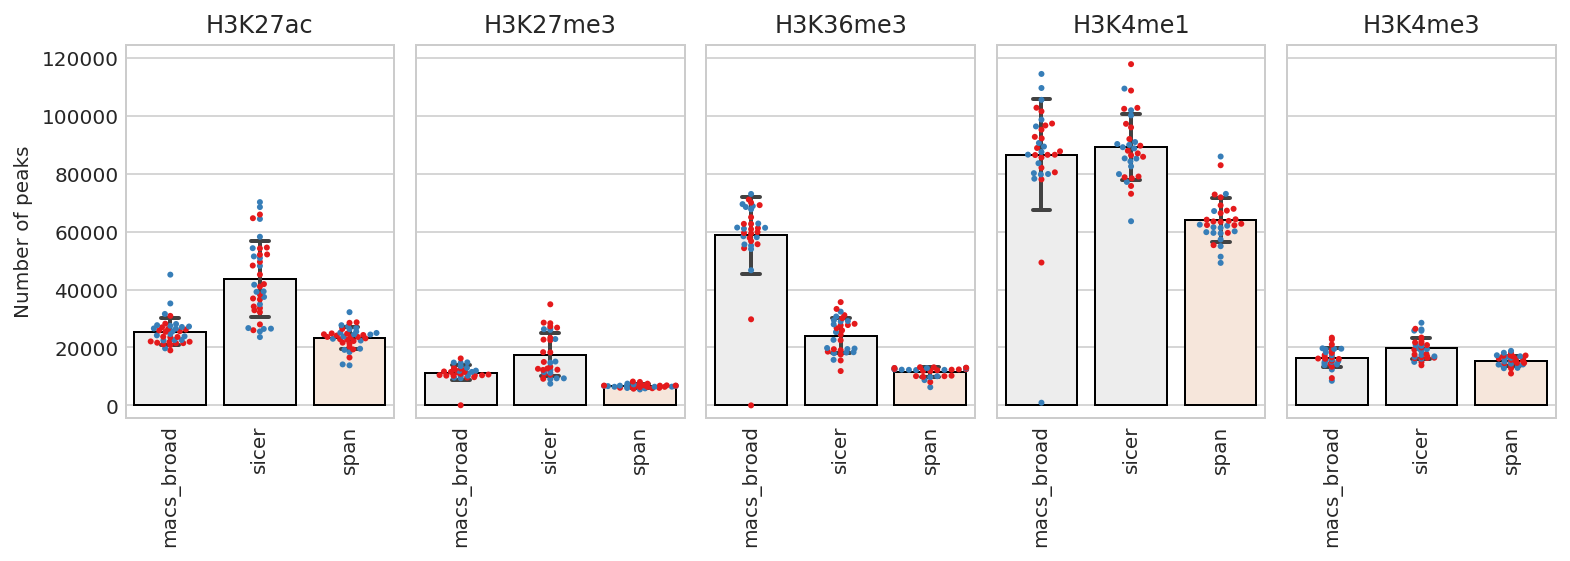

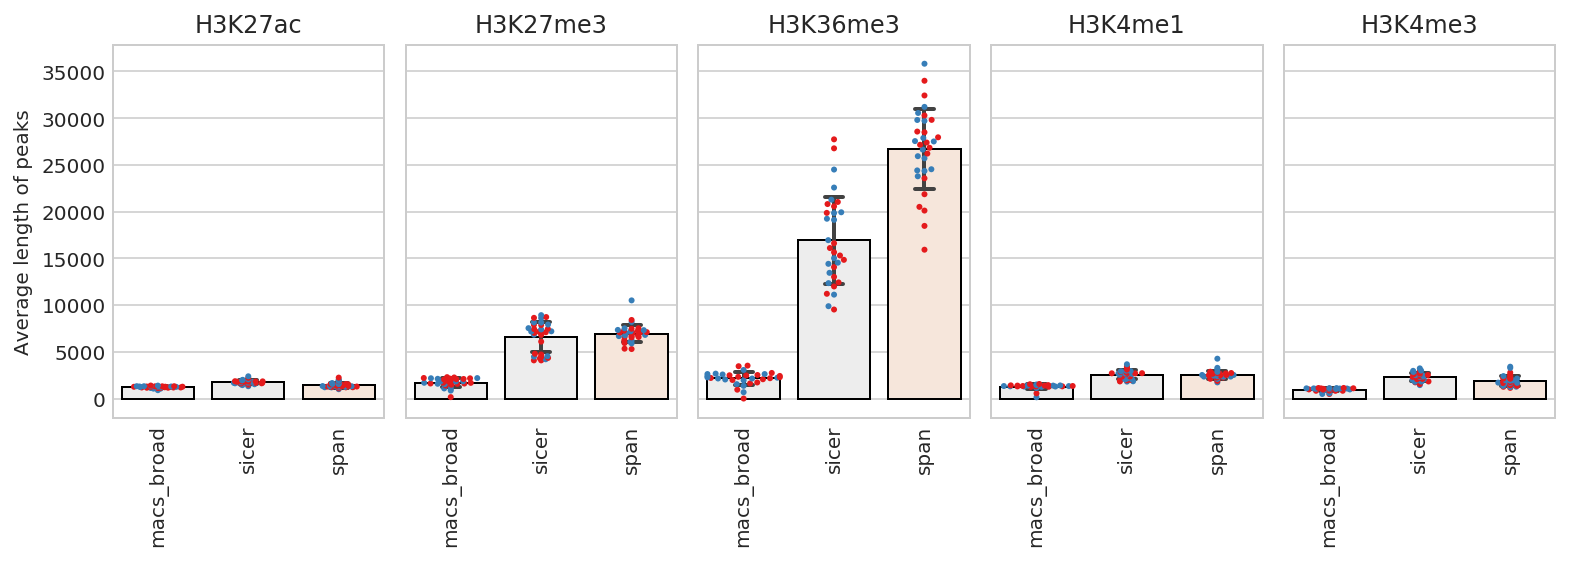

In [51]:
toshow = OrderedDict([
    ("H3K27ac", [("MACS_BROAD", "tuned"), ("SICER", "tuned"), ("SPAN", "tuned")]),
    ("H3K27me3", [("MACS_BROAD", "tuned"), ("SICER", "tuned"), ("SPAN", "tuned")]),
    ("H3K36me3", [("MACS_BROAD", "tuned"), ("SICER", "tuned"), ("SPAN", "tuned")]),
    ("H3K4me1", [("MACS_BROAD", "tuned"), ("SICER", "tuned"), ("SPAN", "tuned")]),
    ("H3K4me3", [("MACS_BROAD", "tuned"), ("SICER", "tuned"), ("SPAN", "tuned")])
])

# Plot peaks number
with PdfPages('/mnt/stripe/figures/peaks_number_tuned.pdf') as pdf:
    plot_data(df, toshow, 'peaks', 'Number of peaks')
    pdf.savefig()

# Plot peaks length
with PdfPages('/mnt/stripe/figures/peaks_length_tuned.pdf') as pdf:
    plot_data(df, toshow, 'avg_length', 'Average length of peaks')
    pdf.savefig()    

# Figure 6 SPAN tuned vs defaults

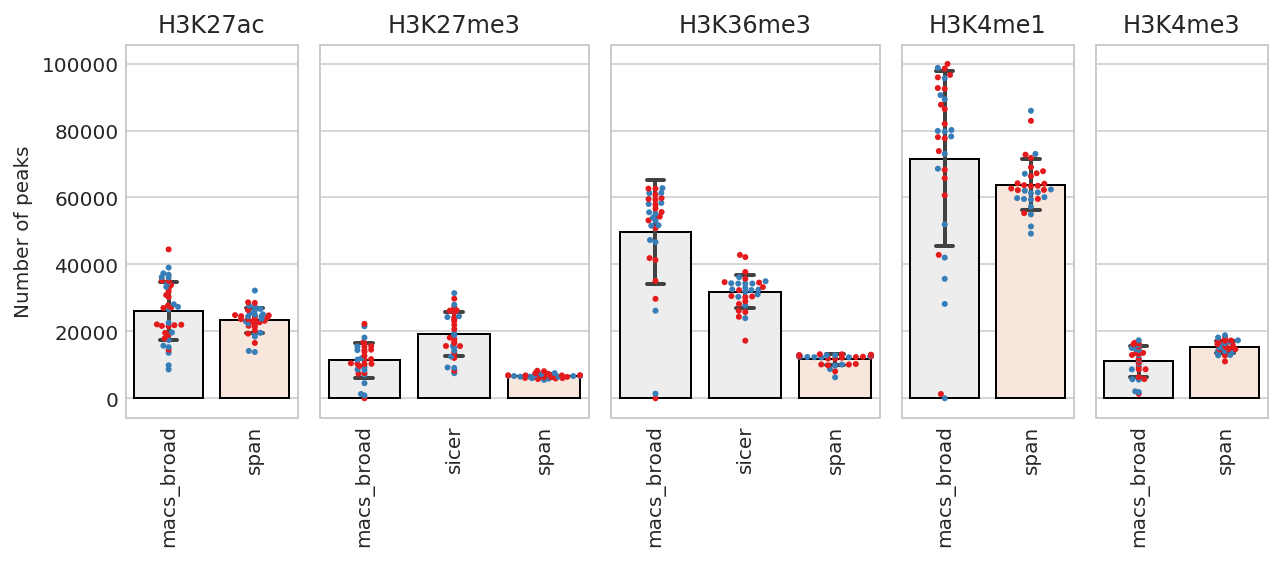

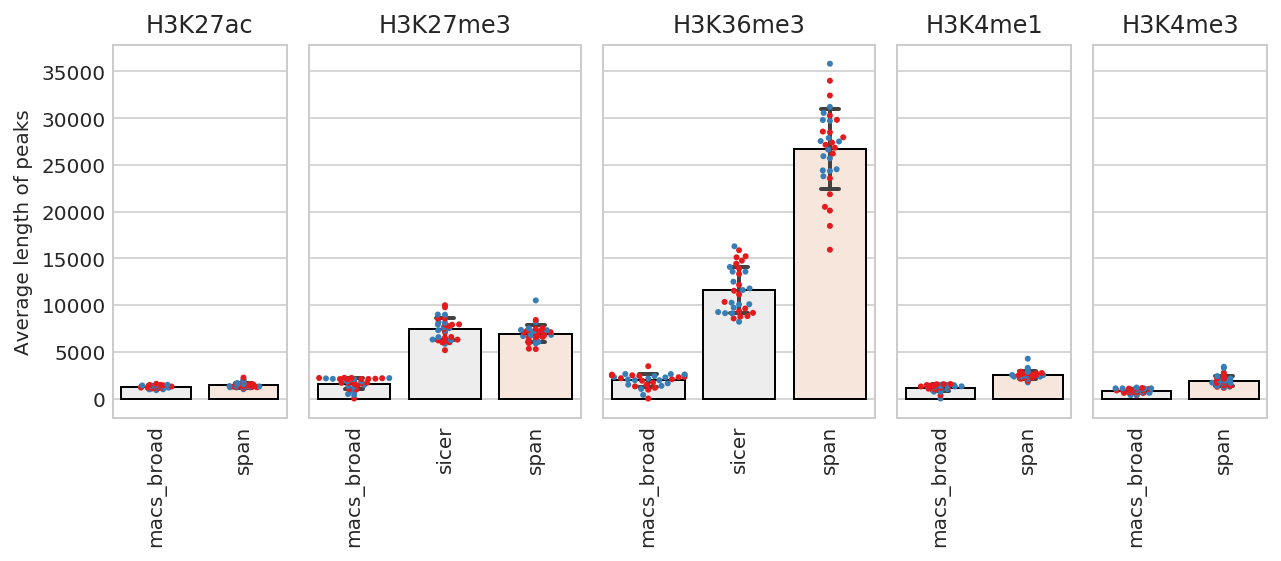

In [52]:
toshow = OrderedDict([
    ("H3K27ac", [("MACS_BROAD", "default"), ("SPAN", "tuned")]),
    ("H3K27me3", [("MACS_BROAD", "default"), ("SICER", "default"), ("SPAN", "tuned")]),
    ("H3K36me3", [("MACS_BROAD", "default"), ("SICER", "default"), ("SPAN", "tuned")]),
    ("H3K4me1", [("MACS_BROAD", "default"), ("SPAN", "tuned")]),
    ("H3K4me3", [("MACS_BROAD", "default"), ("SPAN", "tuned")])
])

# Plot peaks number
with PdfPages('/mnt/stripe/figures/peaks_number.pdf') as pdf:
    plot_data(df, toshow, 'peaks', 'Number of peaks')
    pdf.savefig()

# Plot peaks length
with PdfPages('/mnt/stripe/figures/peaks_length.pdf') as pdf:
    plot_data(df, toshow, 'avg_length', 'Average length of peaks')
    pdf.savefig()    

# Signal to noise ratio

Computed by `ChipSeqSignalToNoise` experiment.

Input file: `/mnt/stripe/bio/experiments/signal_to_noise/signal_to_noise.tsv`

In [ ]:
sn_df = pd.read_csv('/mnt/stripe/bio/experiments/signal_to_noise/signal_to_noise_Y20O20.tsv', 
                    sep='\t', names=['modification', 'cell', 'donor', 'sn', 'file'])

sn_df["age"] = "Young"
sn_df.loc[sn_df.donor.str.startswith("OD"), "age"] = "Old"

sn_df_encode = pd.read_csv('/mnt/stripe/bio/experiments/signal_to_noise/signal_to_noise_cd14encode.tsv', 
                            sep='\t', names=['modification', 'cell', 'donor', 'sn', 'file'])


fig = plt.figure(figsize=(5, 5))
sns.set_style("whitegrid")

ax = sns.barplot(data=sn_df, 
         x="modification", y='sn',
         ci="sd", capsize=.2, errwidth=2,
         color="lightgray",
         edgecolor="black")

ax = sns.swarmplot(data=sn_df, 
      x="modification", y='sn',
      size=3, #5
      hue = "age",
      palette=AGE_PALETTE)

ax = sns.swarmplot(data=sn_df_encode, 
      x="modification", y='sn',
      size=7, #5
      color='black')

plt.xlabel('')
plt.ylabel('signal to noise')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()